<center><font size=4><b>ML For Bio</b></center><br>
<center><font size=3><b>Linear Regression and Regularization</b></center><br>
<b><font size=3>Javad Razi (401204354)</b>

---

### Read Data

In [442]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [443]:
# Config libraries
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [444]:
# Read the dataset
df = pd.read_csv('./dataset_bmi.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


### Split the Data  
Split the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [445]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Categorize BMI, so we can strattify based on BMI group, which is a discrete value
# Discretization of BMI (Intervals come from the wikipedia page of BMI)
df['BMI_CAT'] = pd.cut(df['BMI'], bins=[0.0, 16.0, 16.9, 18.4, 24.9, 29.9, 34.9, 39.9, 100.0], labels=['Underweight_3', 'Underweight_2', 'Underweight_1', 'Normal', 'Overweight', 'Obese_1', 'Obese_2', 'Obese_3'], include_lowest=True)

# Weight and height are also excluded from features list, since the label (BMI category) is a function of these two parameters.
feature_df = df[df.columns.difference(['BMI', 'BMI_CAT'])]
label_df = df[['BMI', 'BMI_CAT']]


# Create test and train datasets. Strattify based on BMI category. Note that the train and test data contain the whole table, so we don't need the last two outputs of function.
train_data, test_data, train_data_y, test_data_y = train_test_split(feature_df, label_df, test_size=0.2, train_size=0.8, shuffle=True, random_state=93, stratify=label_df['BMI_CAT'])

train_data_df = train_data.join(train_data_y)
test_data_df = test_data.join(test_data_y)

print('Train Data')
print(train_data.head().iloc[:3, :-7]) # So the output can fit in the screen
print()
print('Test Data')
print(test_data.head().iloc[:3, :-7]) # So the output can fit in the screen

print()
print('Train Data Labels')
print(train_data_y.head().iloc[:3, ])

print()
print('Test Data Labels')
print(test_data_y.head().iloc[:3, ])



Train Data
      Age        CAEC        CALC  CH2O  FAF FAVC  FCVC  Gender  Height
480  18.0   Sometimes   Sometimes   1.0  0.0  yes   2.0  Female    1.57
472  18.0  Frequently          no   2.0  1.0   no   3.0  Female    1.54
267  38.0  Frequently  Frequently   2.0  0.0  yes   3.0    Male    1.70

Test Data
            Age       CAEC       CALC      CH2O       FAF FAVC      FCVC Gender    Height
481   18.000000  Sometimes  Sometimes  1.000000  2.000000  yes  3.000000   Male  1.740000
1551  40.500210  Sometimes         no  1.000000  1.628637  yes  2.317459   Male  1.748103
1553  22.276969  Sometimes  Sometimes  1.555534  0.348839  yes  3.000000   Male  1.849950

Train Data Labels
      BMI     BMI_CAT
480  23.7      Normal
472  28.4  Overweight
267  31.1     Obese_1

Test Data Labels
       BMI  BMI_CAT
481   19.9   Normal
1551  38.6  Obese_2
1553  33.7  Obese_1


### Exploratory Data Analysis : 1  
Analyze the data and find information about different attributes
#### Part 1
Number of categories and distribution of them in either plots or numbers

In [446]:
# part 1
# function for calculating distribution of categories
import matplotlib.pyplot as plt

def category_dist(data):
    grouped_data = data.groupby(by='BMI_CAT')
    agg_data = grouped_data.aggregate(Count=('BMI_CAT', 'count'))
    agg_data['frequency'] = agg_data.apply(lambda x: x/len(train_data.index))
    
    return agg_data

def plot_category_dist(data):
    plt.bar(data.index.categories, data['Count'].values)
    plt.xticks(rotation=90)

    plt.show()

Num of categories: 8


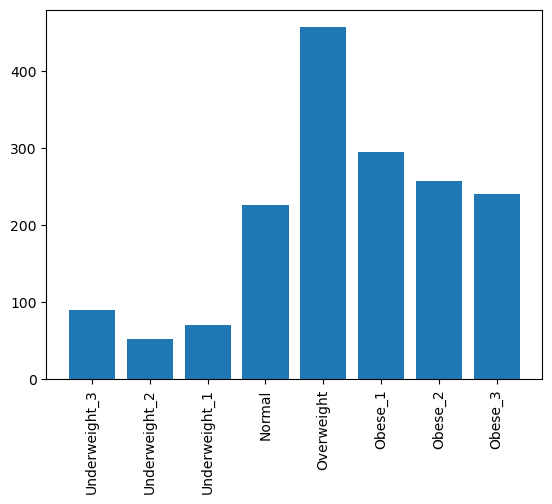

In [447]:
# part 1 
# train data

train_cat_dist = category_dist(train_data_df)

print("Num of categories:", len(train_cat_dist.index.categories))
plot_category_dist(train_cat_dist)



Num of categories: 8


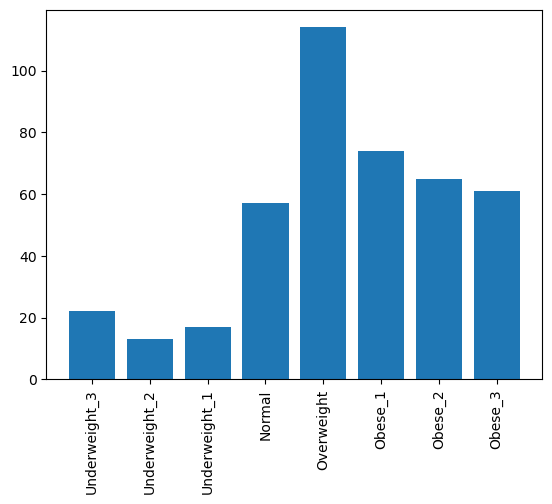

In [448]:
# part 1 
# test data

test_cat_dist = category_dist(test_data_df)

print("Num of categories:", len(test_cat_dist.index.categories))
plot_category_dist(test_cat_dist)


#### Part 2
Mean, std, and quartiles of numerical attributes



In [449]:
# part 2
# original data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.902132
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.460415
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.800000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.550000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,29.300000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.600000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,48.500000


In [450]:
# part 2
# train data
train_data_df.describe()

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,BMI
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.290125,2.009430,1.008422,2.413688,1.701006,2.692156,0.655279,86.441723,29.912855
std,6.314618,0.616468,0.844961,0.538026,0.093061,0.784438,0.602070,26.123567,8.455257
min,14.000000,1.000000,0.000000,1.000000,1.450000,1.000000,0.000000,39.000000,12.800000
25%,19.870974,1.585688,0.129009,2.000000,1.629388,2.658289,0.000000,65.483043,24.600000
50%,22.821925,2.000000,1.000000,2.367128,1.700000,3.000000,0.625215,83.000000,29.300000
75%,26.000000,2.488593,1.677185,3.000000,1.768285,3.000000,1.000000,106.569241,36.625000
max,56.000000,3.000000,3.000000,3.000000,1.975663,4.000000,2.000000,173.000000,48.500000


In [451]:
# part 2
# test data
test_data_df.describe()

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,BMI
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,24.402289,2.002350,1.017783,2.440414,1.704357,2.659580,0.668188,87.162034,29.859338
std,6.476371,0.599408,0.873684,0.517313,0.094333,0.752302,0.636188,26.482554,8.490859
min,15.000000,1.000000,0.000000,1.000000,1.483284,1.000000,0.000000,40.202773,13.200000
25%,20.000000,1.584812,0.113911,2.000000,1.633841,2.676552,0.000000,65.711971,24.400000
50%,22.675679,2.000000,1.000000,2.407817,1.705813,3.000000,0.630866,82.636162,29.400000
75%,26.000000,2.443450,1.625346,3.000000,1.769417,3.000000,1.000000,109.749962,36.250000
max,61.000000,3.000000,3.000000,3.000000,1.980000,4.000000,2.000000,160.935351,47.500000


#### Part 3
Check for existence of NaN or empty rows
<br>

As displayed in the output, there were no empty or NaN fields

In [452]:
# part 3 : check for existense of NaN or empty rows
null_row = df.isnull().values.sum()
NaN_row_count = df.isna().values.sum()

print('Empty Row Count:', null_row)
print('Nan Row Count:', NaN_row_count)

Empty Row Count: 0
Nan Row Count: 0


In [453]:
# part 4
# correlation between columns in the matrix
    
# function to plot correlation for data
def plot_correlation_matrix(corr_matrix, vmin=-1.0, vmax=1.0, cmap='coolwarm'): 
    cols = corr_matrix.index.tolist()

    # Diverging color map. The closer you get to zero, the color is colder. 
    cmap = plt.get_cmap(cmap).copy()
    cmap.set_over('green')
    cmap.set_under('white')
    cmap.set_bad('grey')
    
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
    
    plt.matshow(corr_matrix, cmap=cmap, norm=norm)
    plt.xticks(rotation=90, ticks=range(len(cols)), labels=cols)
    plt.yticks(ticks=range(len(cols)), labels=cols)
    plt.colorbar()
    plt.show()

def plot_correlation(data): 
    corr_matrix = data.corr()
    plot_correlation_matrix(corr_matrix)
    return corr_matrix


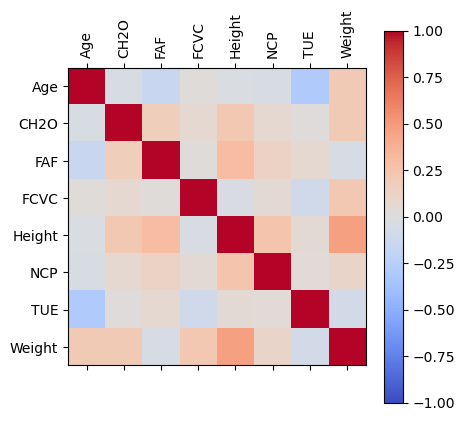

In [454]:
# part 4
# correlation matrix for the original data
data_corr_matrix = plot_correlation(feature_df)

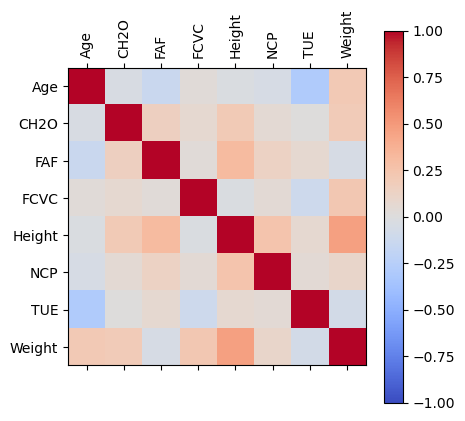

In [455]:
# part 4
# correlation matrix for the train data
plot_correlation(train_data)
pass

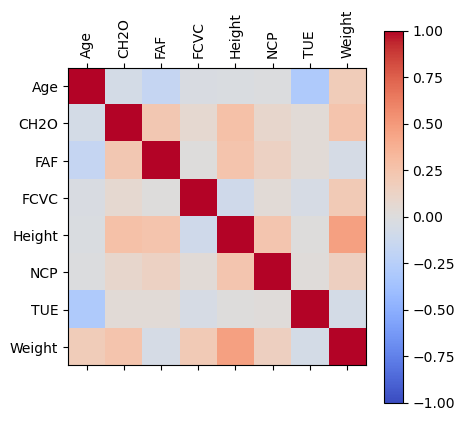

In [456]:
# part 4
# correlation matrix for the test data
plot_correlation(test_data)
pass

### Data Cleaning and Manipulation

**Transformation of Attributes**<br>
`OrdinalEncoder`, and `OneHotEncoder` from scikit-learn are used for encoding categorical values. the function `make_column_transformer` is a convinient method to chain the encoders. 

**Ordinal vs One-Hot Encoder**<br>
Features that have a natural order should be transformed using ordinal encoder. Attributes like "CAEC" which represent the frequency of something, have a natural order (From never, to always). Meanwhile, no order can be defined for the "Gender" attribute. These attributes should be encoded via one-hot encoder. 

In [457]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import set_config
from sklearn.compose import make_column_transformer

nominal_features = ['Gender', 'SMOKE', 'FAVC', 'SCC', 'MTRANS', 'family_history_with_overweight']
ordinal_features = ['CAEC', 'CALC']
numeric_features = feature_df.columns.difference(nominal_features + ordinal_features).tolist()

# Make nominal and ordinal transformers.For features that do not have a natural order or rank, OneHotEncoder is chosen.
transformer = make_column_transformer(
    ('passthrough', numeric_features),
    (OrdinalEncoder(), ordinal_features),
    (OneHotEncoder(drop='if_binary'), nominal_features),
    verbose_feature_names_out=False
)

feature_df_transformed_np = transformer.fit_transform(feature_df)
column_names = (
    numeric_features
    + ordinal_features    
    + transformer.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
feature_df_transformed = pd.DataFrame(feature_df_transformed_np, columns=column_names)
feature_df_transformed


,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,CAEC,CALC,Gender_Male,SMOKE_yes,FAVC_yes,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes
0,21.000000,2.000000,0.000000,2.0,1.620000,3.0,1.000000,64.000000,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,21.000000,3.000000,3.000000,3.0,1.520000,3.0,0.000000,56.000000,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,23.000000,2.000000,2.000000,2.0,1.800000,3.0,1.000000,77.000000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,27.000000,2.000000,2.000000,3.0,1.800000,3.0,0.000000,87.000000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.000000,2.000000,0.000000,2.0,1.780000,1.0,0.000000,89.800000,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.728139,1.676269,3.0,1.710730,3.0,0.906247,131.408528,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2107,21.982942,2.005130,1.341390,3.0,1.748584,3.0,0.599270,133.742943,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2108,22.524036,2.054193,1.414209,3.0,1.752206,3.0,0.646288,133.689352,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2109,24.361936,2.852339,1.139107,3.0,1.739450,3.0,0.586035,133.346641,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Addition of Two New Attributes
There are multiple criteria for choosing new attributes, and dropping others. One important thing is to keep the features as statistically independent as possible. (Obviously other things like features being relevant is also important)
The independence of features means that the columns in feature matrix will be linearly independent. That means our feature matrix will be invertible. 

First, we need to check which potential features are highly correlated. The correlation matrix for the transformed data frame is displayed as the output of the following cell. The correlations with absolute coefficient below 0.1 are ignored. 

In the next part we will use the correlation color-map, and other criteria to add new attributes and drop ones that are no longer needed. 

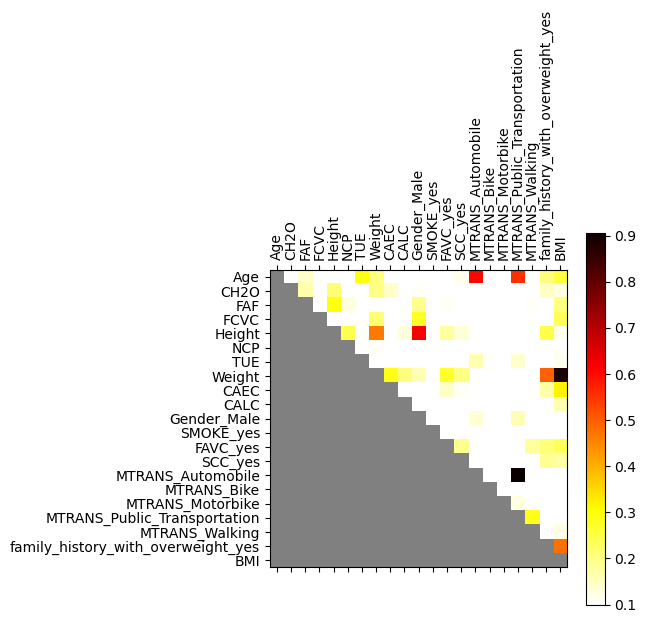

In [458]:
df_transformed = feature_df_transformed.join(label_df)

WEAK_CORR_THRESHOLD = 0.1
MODERATE_CORR_THRESHOLD = None

corr_matrix = df_transformed.corr().abs()
upper_corr_matrix = corr_matrix.where(corr_matrix.lt(1.0)).where(np.triu(np.ones(corr_matrix.shape)).astype(bool))
plot_correlation_matrix(upper_corr_matrix, vmin=WEAK_CORR_THRESHOLD, vmax=MODERATE_CORR_THRESHOLD, cmap='hot_r')


In [459]:
# Sorting by the absolute value of correlation coefficient. 
corr_score_sorted = upper_corr_matrix.unstack().sort_values(ascending=False)
corr_score_sorted = corr_score_sorted.where(corr_score_sorted.gt(0.25)).dropna()
corr_score_sorted = list(corr_score_sorted.items())
corr_score_sorted = list(map(lambda tuple: tuple, corr_score_sorted))
corr_score_sorted

[(('MTRANS_Public_Transportation', 'MTRANS_Automobile'), 0.9067167327361628),
 (('BMI', 'Weight'), 0.8826831983883207),
 (('Gender_Male', 'Height'), 0.6184662968745156),
 (('MTRANS_Automobile', 'Age'), 0.6046825158618168),
 (('MTRANS_Public_Transportation', 'Age'), 0.5544479189904326),
 (('family_history_with_overweight_yes', 'Weight'), 0.496820376733974),
 (('BMI', 'family_history_with_overweight_yes'), 0.47644394295022235),
 (('Weight', 'Height'), 0.4631361166156239),
 (('BMI', 'CAEC'), 0.31993922670768304),
 (('TUE', 'Age'), 0.2969305920683245),
 (('Height', 'FAF'), 0.29470899846596554),
 (('CAEC', 'Weight'), 0.28749346301035633),
 (('MTRANS_Walking', 'MTRANS_Public_Transportation'), 0.2847537048912017),
 (('Gender_Male', 'FCVC'), 0.2745047818701684),
 (('FAVC_yes', 'Weight'), 0.27230049038776044),
 (('BMI', 'Age'), 0.2575543794422597)]

From the above data, the extremely high (negative) correlation between the two transportation methods (public vs automobile) makes it clear that there is redundancy in our features. 
It also appears that having an obese relative, age and CAEC (frequency of consumption of food between meals) are good predictors of BMI, so they are good candidates to be features for our model. 

The following attributes are going to be added to the dataset as the new features of the model. 
* **Age_Group**: As shown in the correlation color-map, age is highly correlated with BMI, and some other attributes. However, having age as a continious attribute would make the training more complex, without adding any benefit. (It is clear that in this context, the relationship between age and BMI, or transportation method, depends on the age group (kid, teenager, adult, etc) and the specific age is extra complexity.  

* **Transportation_Has_Physical_Load**: As shown in the above color-map, none of the one-hot attributes that define transportation method, have a significant correlation with BMI. Also, age is highly correlated with two of the transporation-related attributes (public and automobile), and statistical dependency between model features is not desirable. Another thing is that intuitively, the part of the transportation method that is highly related to lifestyle and is expected to affect obesity, is the level of physical activity that method requires. Thus, this new attribute, which is a one-hot attribute that is reduced to one boolean feature is introduced. Automobile, motorbike and public transportation involve very low physical activity and will make the value `False`. Meanwhile, walking and biking both involve a degree of physical activity and will make the value `True`.

The following code adds these two new attributes, and removes the ones that these attributes are going to replace. 

In [460]:
feature_df_transformed
feature_df_transformed.drop(feature_df_transformed.columns[feature_df_transformed.columns.str.endswith('_Adult')], axis=1, inplace=True)


# Add `Transportation_Has_Physical_Load` attribute, drop extra columns. 
trans_load = {'Automobile': 0.0, 'Public_Transportation': 0.0, 'Motorbike': 0.0, 'Walking': 1.0, 'Bike': 1.0}
feature_df_transformed['Transportation_Has_Physical_Load'] = df['MTRANS'].map(trans_load)
feature_df_transformed.drop(feature_df_transformed.columns[feature_df_transformed.columns.str.startswith('MTRANS_')], axis=1, inplace=True)


# Add `Age_Group` attribute, transform it with one-hot encoding, drop the `Age` column
feature_df_transformed['Age'] = df['Age']
feature_df_transformed['Age_Group'] = pd.cut(feature_df_transformed['Age'], bins=[0.0, 16.0, 35, 50, 120], labels=['Non_Adult', 'Young_Adult', 'MidAge_Adult', 'Old_Adult'])
age_transformer = make_column_transformer(
    (OneHotEncoder(), ['Age_Group']),
    remainder='passthrough',
    verbose_feature_names_out=False
)

feature_df_transformed = pd.DataFrame(age_transformer.fit_transform(feature_df_transformed), columns=age_transformer.get_feature_names_out())


feature_df_transformed.drop(['Age'], axis=1, inplace=True)

# Checking the number of samples in each age bin
df_transformed = feature_df_transformed.join(label_df)
df_transformed.groupby(by=age_transformer.named_transformers_['onehotencoder'].get_feature_names_out().tolist()).size()

Age_Group_MidAge_Adult  Age_Group_Non_Adult  Age_Group_Old_Adult  Age_Group_Young_Adult
0.0                     0.0                  0.0                  1.0                      1932
                                             1.0                  0.0                        10
                        1.0                  0.0                  0.0                        11
1.0                     0.0                  0.0                  0.0                       158
dtype: int64

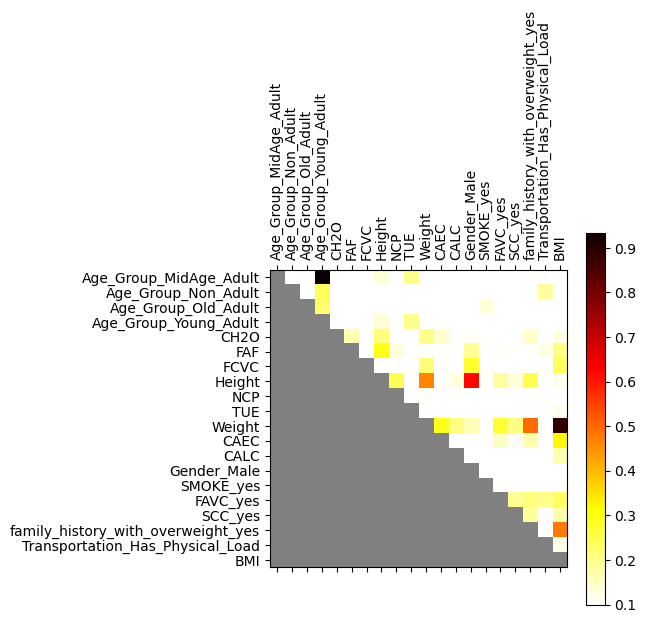

In [461]:
# The correlation color-map of the updated set of features
corr_matrix = df_transformed.corr().abs()
upper_corr_matrix = corr_matrix.where(corr_matrix.lt(1.0)).where(np.triu(np.ones(corr_matrix.shape)).astype(bool))
plot_correlation_matrix(upper_corr_matrix, vmin=WEAK_CORR_THRESHOLD, vmax=MODERATE_CORR_THRESHOLD, cmap='hot_r')


#### Scaling of Data, And Buliding Pipeline

#### Scaling The Data

In [462]:
pass

#### Building a Pipeline

In [463]:
pass

### Principal Component Analysis  
Use `sklearn.decomposition.PCA` to reduce the dimension of dataset to a convenient number. Plot the scree plot for the final solution.

### Model Training  
Train the <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on your training data. Cross-validate the models using <code>10 fold CV</code> and report the accuracy scores. You are allowed to use <code>sklearn.linear_model</code> for your implementation.

#### Linear Regression

#### Ridge Regression

#### Lasso Regression

### Final Report  
1. After training the data, use your pipeline previously created to transform the test data to decent form and then run your final model and report the accuracy score.

2. Discuss why you think this model worked best for the selected datasets and mention 3 areas where extra effort can be put into work to enhance the accuracy.